In [1]:
"""
Mount Google Colab Notebook correctly so we are in the correct relative directory
"""
from google.colab import drive
drive.mount('/content/gdrive')
% cd /content/gdrive/My Drive/Github/"CS 499 - SPRING 2022"/"3. Experiments"/"3. GNN (only) - Pytorch Geometric"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Github/CS 499 - SPRING 2022/3. Experiments/3. GNN (only) - Pytorch Geometric


In [2]:
"""
Ensure we have correct version of Pytorch Geometric before importing or installing anything else
"""
# Code in this cell is courtesy of: https://gist.github.com/ameya98/b193856171d11d37ada46458f60e73e7 
# Add this in a Google Colab cell to install the correct version of Pytorch Geometric.
import torch
import os

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric 
!pip install ogb

print("PyTorch has version {}".format(torch.__version__))

Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
PyTorch has version 1.10.0+cu111


In [3]:
"""
Import any other libraries we will use later on
"""
! pip install epiweeks
! pip install haversine
from preprocess_data import get_preprocessed_data
from torch_geometric.data import Data

In [5]:
"""
Set device (CPU or GPU)
"""
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [4]:
"""
Get preprocessed data
"""

preprocessed_data = get_preprocessed_data()

training_variables = preprocessed_data['training_variables']
validation_variables = preprocessed_data['validation_variables']
testing_variables = preprocessed_data['testing_variables']

edge_index = preprocessed_data['edge_index']

train_x = training_variables['train_x']
train_y = training_variables['train_y']

val_x = validation_variables['val_x']
val_y = validation_variables['val_y']

test_x = testing_variables['test_x']
test_y = testing_variables['test_y']


Finish download


In [13]:
"""
Put preprocessed data into "Data" objects and put "Data" objects into tensors on the "device"
"""
training_data = []
validation_data = []
testing_data = []
for i in range(len(train_x)):
  toAppend = Data(x=train_x[i], y=train_y[i], edge_index=edge_index).to(device)
  training_data.append(toAppend)
for i in range(len(val_x)):
  toAppend = Data(x=val_x[i], y=val_y[i], edge_index=edge_index).to(device)
  validation_data.append(toAppend)
for i in range(len(test_x)):
  toAppend = Data(x=test_x[i], y=test_y[i], edge_index=edge_index).to(device)
  testing_data.append(toAppend)

In [29]:
"""
Define network architecture, optimizer, and loss function
"""
# Reference: https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html 
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

inputLayer_num_features = 24 
hiddenLayer1_num_features = 24
outputLayer_num_features = 15 # pred_window

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(inputLayer_num_features, hiddenLayer1_num_features)
        self.conv2 = GCNConv(hiddenLayer1_num_features, outputLayer_num_features)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = self.conv2(x, edge_index)
        print(x.shape)

        return x

model = GCN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

In [30]:
"""
Training
"""
def train():
  total_loss = 0.0
  for data in training_data:
    model.train()
    optimizer.zero_grad()
    predicted_output = model(data)
    labeled_output = data.y.to(device)
    loss = criterion(predicted_output, labeled_output)
    loss.backward()
    total_loss += loss.item()
    optimizer.step()
  return total_loss

for epoch in range(1):
  print(train())


torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([52, 15])
torch.Size([5

torch.Size([52, 15])
1344231047168.0
tensor([1538945.6250, 1541158.8750, 1557117.2500, 1543361.0000, 1573152.6250,
        1566201.5000, 1556912.3750, 1588366.3750, 1562045.0000, 1576313.3750,
        1585790.7500, 1572447.2500, 1578466.8750, 1573346.6250, 1588282.3750],
       grad_fn=<SelectBackward0>)
tensor([ 904916.,  915881.,  915881.,  915881.,  932552.,  941986.,  952956.,
         962007.,  975346.,  975346.,  975346.,  975346., 1014703., 1027069.,
        1040420.])


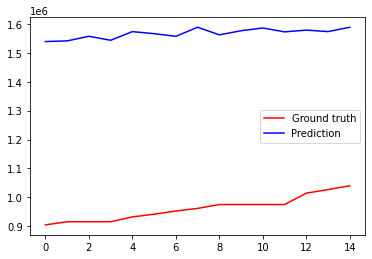

In [48]:
"""
Testing and plotting results
"""
import matplotlib.pyplot as plt

predicted_output = None
labeled_output = None
for data in testing_data:
  model.eval()
  predicted_output = model(data)
  labeled_output = data.y.to(device)
  loss = criterion(predicted_output, labeled_output)
  print(loss.item())

state_num = 17

print(predicted_output[state_num])
print(labeled_output[state_num])

plt.plot(labeled_output[state_num].detach().numpy(),c='r', label='Ground truth')
plt.plot(predicted_output[state_num].detach().numpy(),c='b', label='Prediction')
plt.legend()
plt.show()